# Sales Analysis Data

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_jan = pd.read_csv('Sales_January_2019.csv')
df_feb = pd.read_csv('Sales_February_2019.csv')
df_mar = pd.read_csv('Sales_March_2019.csv')
df_apr = pd.read_csv('Sales_April_2019.csv')
df_may = pd.read_csv('Sales_May_2019.csv')
df_jun = pd.read_csv('Sales_June_2019.csv')
df_jul = pd.read_csv('Sales_July_2019.csv')
df_aug = pd.read_csv('Sales_August_2019.csv')
df_sep = pd.read_csv('Sales_September_2019.csv')
df_oct = pd.read_csv('Sales_October_2019.csv')
df_nov = pd.read_csv('Sales_November_2019.csv')
df_dec = pd.read_csv('Sales_December_2019.csv')

In [8]:
# Combine all into one DataFrame
combined_data = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug , df_sep, df_oct, df_nov, df_dec], ignore_index=True)

# Quick check
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [12]:
# 1. Convert 'Order Date' to datetime format
combined_data['Order Date'] = pd.to_datetime(combined_data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# 2. Extract Month, Day, Hour, Weekday
combined_data['Month'] = combined_data['Order Date'].dt.month
combined_data['Day'] = combined_data['Order Date'].dt.day
combined_data['Hour'] = combined_data['Order Date'].dt.hour
combined_data['Weekday'] = combined_data['Order Date'].dt.day_name()


In [14]:
# Drop rows with missing values in critical columns
combined_data.dropna(inplace=True)

# Remove duplicates if any
combined_data.drop_duplicates(inplace=True)

In [15]:
# Convert to numeric (with error handling)
combined_data['Quantity Ordered'] = pd.to_numeric(combined_data['Quantity Ordered'], errors='coerce')
combined_data['Price Each'] = pd.to_numeric(combined_data['Price Each'], errors='coerce')

# Drop rows with invalid Quantity or Price
combined_data.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

# Calculate Total Price
combined_data['Total Price'] = combined_data['Quantity Ordered'] * combined_data['Price Each']

In [16]:
# Now for checking the changes
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Weekday,Total Price
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0,22.0,21.0,Tuesday,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0,28.0,14.0,Monday,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0,17.0,13.0,Thursday,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0,5.0,20.0,Saturday,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0,25.0,11.0,Friday,11.99


In [17]:
combined_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Day                 0
Hour                0
Weekday             0
Total Price         0
dtype: int64

In [18]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  float64       
 7   Day               185686 non-null  float64       
 8   Hour              185686 non-null  float64       
 9   Weekday           185686 non-null  object        
 10  Total Price       185686 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 17.0+ MB


In [19]:
combined_data.to_excel("combined11_sales_data.xlsx", index=False)

 # Exploratory Data Analysis 

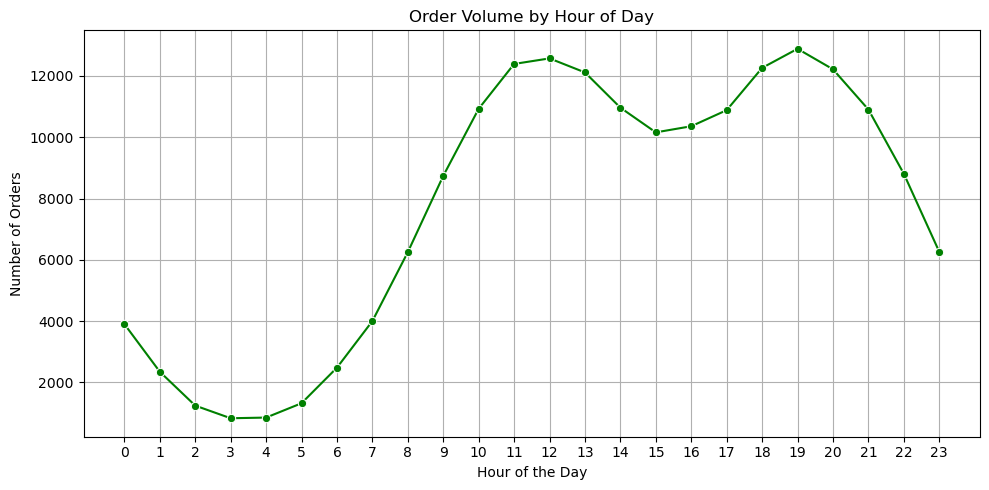

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (adjust path if necessary)
df = pd.read_excel("combined_sales_data.xlsx")

# Group by Hour and count Order ID to get order volume
hourly_orders = df.groupby('Hour')['Order ID'].count()

# Plotting the result
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o', color='green')
plt.title("Order Volume by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Top Products by Revenue, Quantity, and Time-of-Day Preference

C:\Users\sheet\AppData\Local\Temp\ipykernel_5540\3995211047.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='Blues_r')


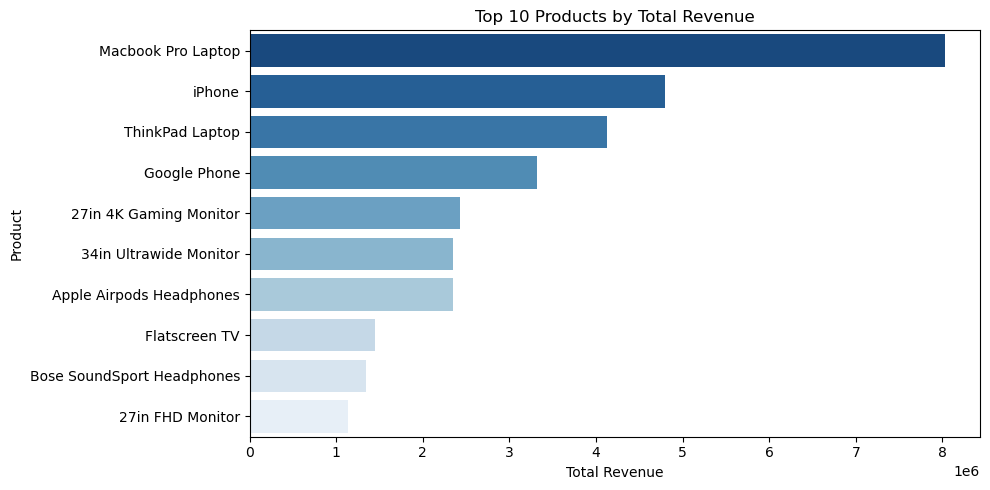

In [24]:
# Top products by revenue
top_revenue = df.groupby('Product')['Total Price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='Blues_r')
plt.title("Top 10 Products by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

C:\Users\sheet\AppData\Local\Temp\ipykernel_5540\812705121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_quantity.values, y=top_quantity.index, palette='Greens_r')


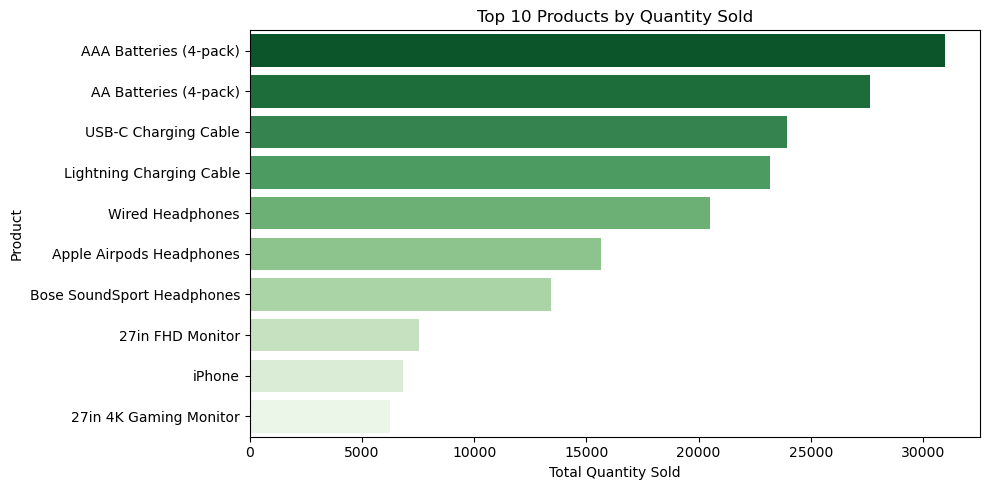

In [25]:
# Top Products by Quantity Sold
top_quantity = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_quantity.values, y=top_quantity.index, palette='Greens_r')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [26]:
#Time-Based Patterns (Seasonality & Hourly Trends)
#Pattern           	   Insight
#Monthly Sales	    Sales are highest in November & December, indicating holiday shopping season (Black Friday, Christmas).
#Daily Sales	    Mid-month days (10th–20th) show slightly higher activity, suggesting salary-cycle influence.
#Hourly Orders	    Most orders occur between 10 AM to 8 PM, with a sharp peak around 11 AM to 2 PM—ideal for marketing pushes or store operation.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/sheet/Downloads/cloudthat assignment/combined11_sales_data.csv")

# --- Initial Data Inspection ---
print("--- Initial Data Inspection ---")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# --- Data Cleaning and Preparation ---
# Convert 'Order Date' to datetime objects for time-series analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])



--- Initial Data Inspection ---

First 5 rows of the DataFrame:
   Order ID                   Product  Quantity Ordered  Price Each  \
0    141234                    iPhone                 1      700.00   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

            Order Date                       Purchase Address  Month  Day  \
0  2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215      1   22   
1  2019-01-28 14:15:00       185 Maple St, Portland, OR 97035      1   28   
2  2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016      1   17   
3  2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001      1    5   
4  2019-01-25 11:59:00          387 10th St, Austin, TX 73301      1   25   

   Hour   Weekday  Total Price  
0    21   Tue

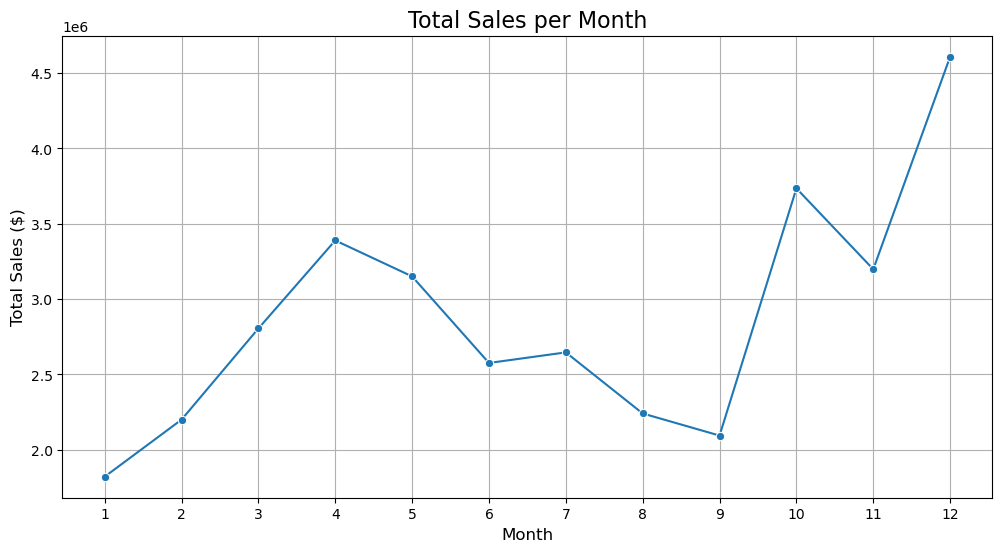

In [197]:
# --- Exploratory Data Analysis (EDA) ---

# 1. Sales Over Time Analysis
# Total sales per month
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Total Price'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Total Sales per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.show()

C:\Users\sheet\AppData\Local\Temp\ipykernel_5540\3370192396.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')


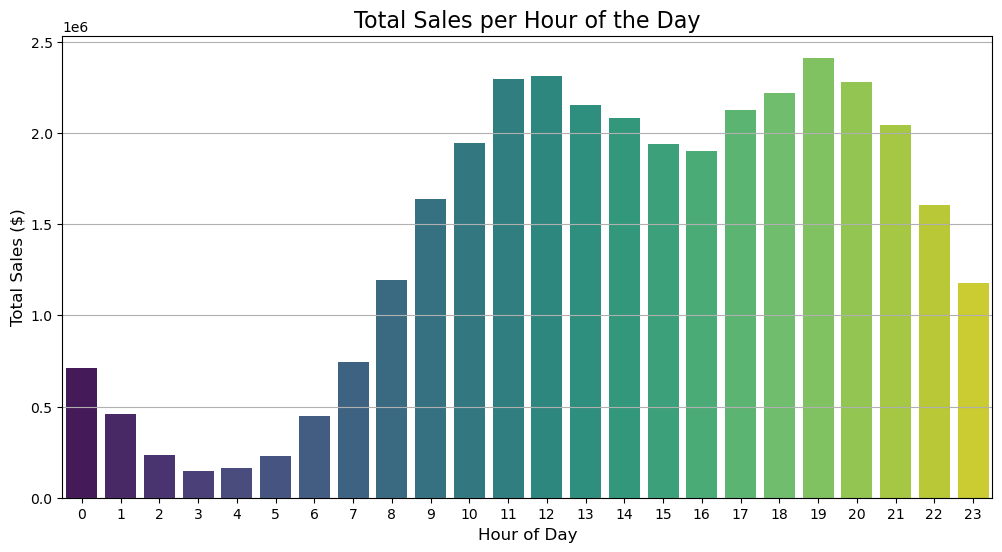

In [199]:
# Total sales per hour
hourly_sales = df.groupby('Hour')['Total Price'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')
plt.title('Total Sales per Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(axis='y')
plt.show()

C:\Users\sheet\AppData\Local\Temp\ipykernel_5540\3889723507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_quantity.values, y=top_10_quantity.index, palette='crest')


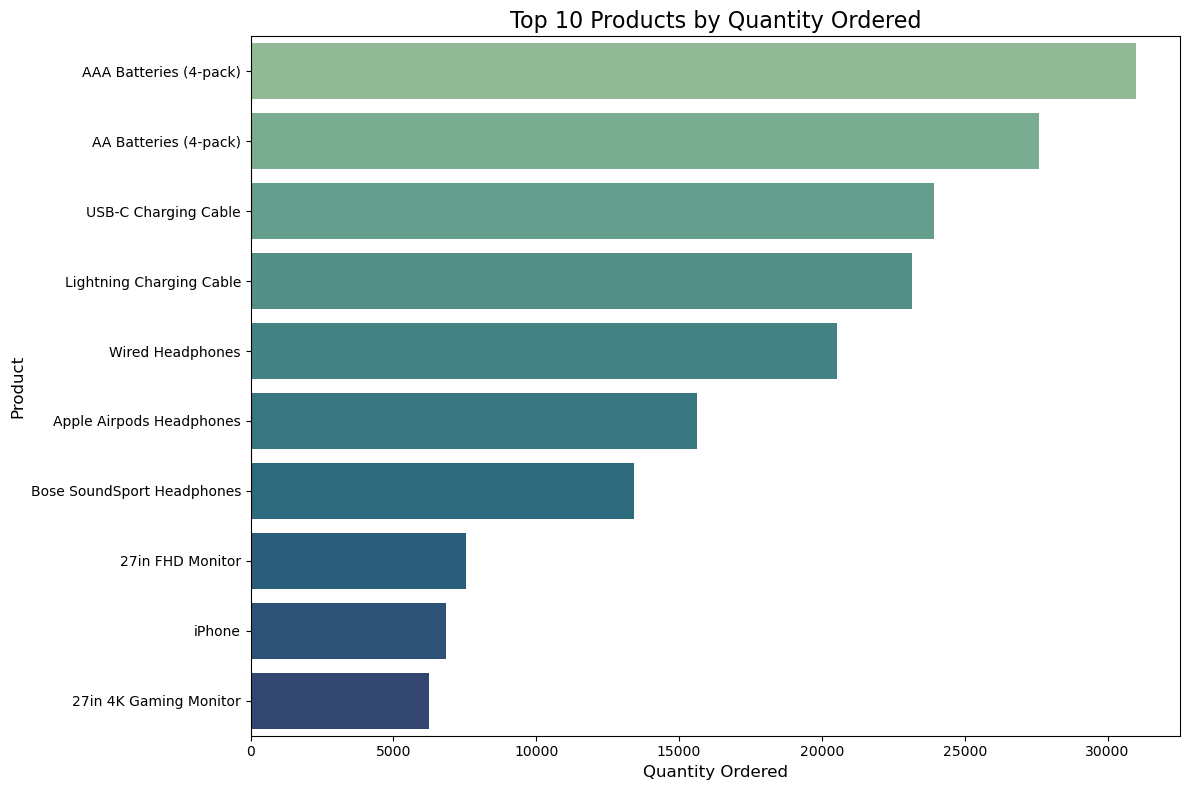

In [201]:
# 2. Product Analysis
# Top 10 products by quantity ordered
top_10_quantity = df.groupby('Product')['Quantity Ordered'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_quantity.values, y=top_10_quantity.index, palette='crest')
plt.title('Top 10 Products by Quantity Ordered', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\sheet\AppData\Local\Temp\ipykernel_5540\564277481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_revenue.values, y=top_10_revenue.index, palette='magma')


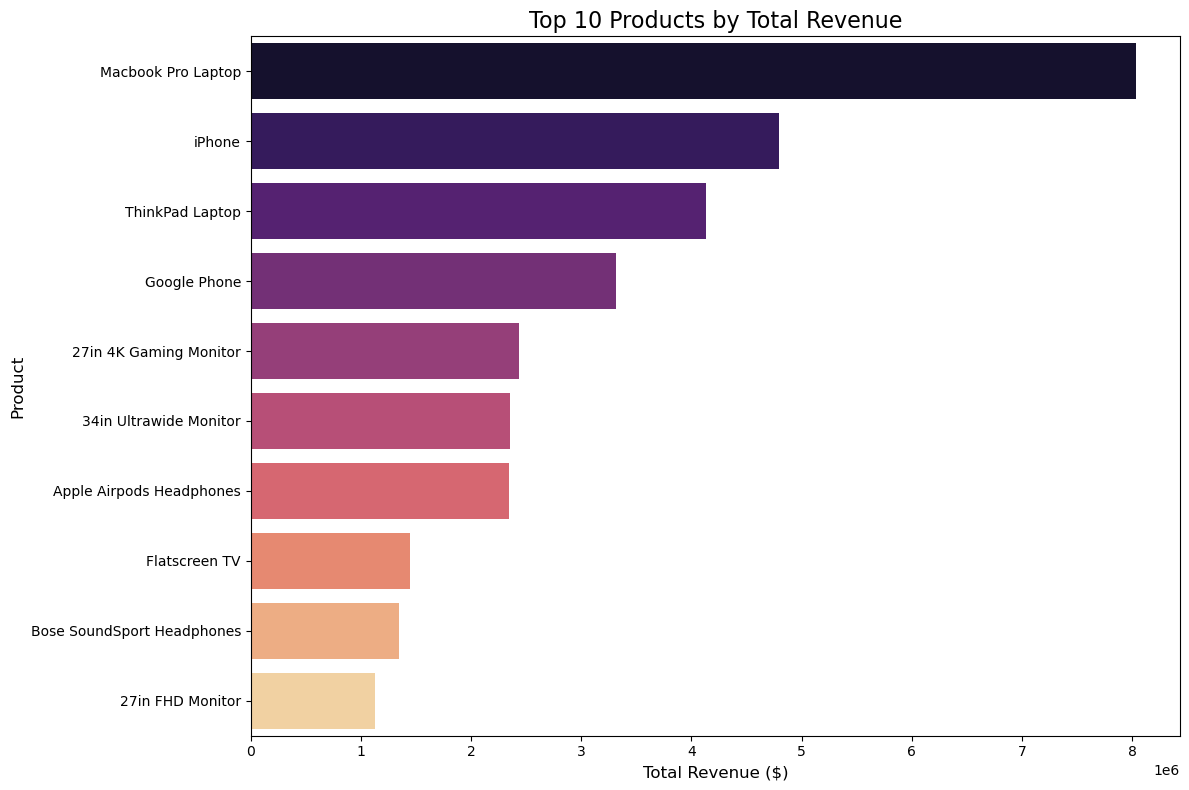

In [204]:
# Top 10 products by total revenue
top_10_revenue = df.groupby('Product')['Total Price'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_revenue.values, y=top_10_revenue.index, palette='magma')
plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\sheet\AppData\Local\Temp\ipykernel_5540\80672633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='cubehelix')


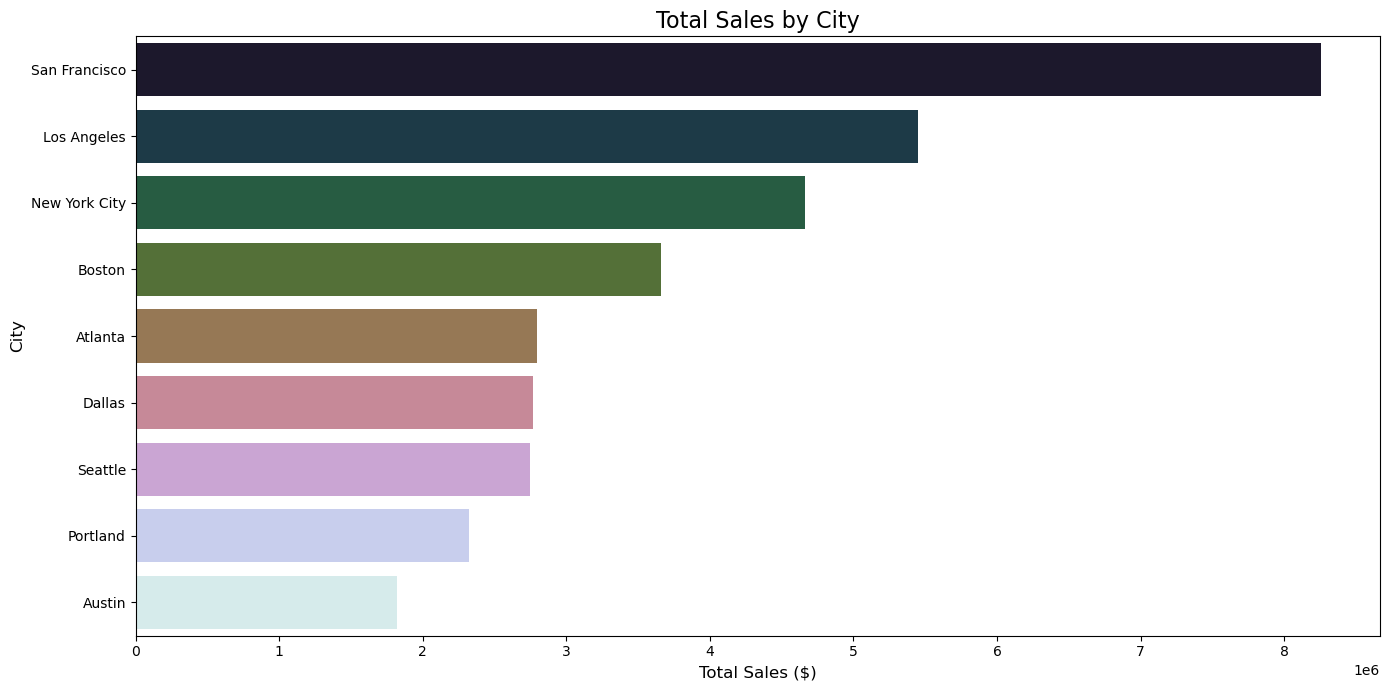

In [205]:
# 3. Geographical Analysis
# Extract city from 'Purchase Address'
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
city_sales = df.groupby('City')['Total Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='cubehelix')
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

# Data Analysis using Machine Learning

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
!pip install xgboost

In [214]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset
df = pd.read_excel("combined11_sales_data.xlsx", sheet_name='Sheet1')

# Step 3: Define features (X) and target (y)
features = ['Quantity Ordered', 'Price Each', 'Month', 'Day', 'Hour']
target = 'Total Price'

X = df[features]
y = df[target]

# Step 4: Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) 

# Step 8: Print Results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Actual values:", list(y_test[:10]))         # First 10 actual values
print("Predicted values:", list(y_pred[:10]))      # First 10 predicted values


C:\Users\sheet\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\sheet\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


Mean Squared Error: 223.27554456071397
R-squared Score: 0.9980442113412271
Root Mean Squared Error (RMSE): 14.94240758916427
Actual values: [149.99, 14.95, 14.95, 379.99, 3.84, 11.99, 300.0, 44.84999999999999, 2.99, 11.95]
Predicted values: [150.36427723535144, 14.942126436173265, 15.041929028565523, 380.44000186840884, 4.021977943530187, 12.006387183232924, 300.3670292659828, 28.4278772277423, 3.104095241611903, 12.08144557087823]


In [215]:
# Load dataset
df = pd.read_excel("combined11_sales_data.xlsx", sheet_name='Sheet1')

# Define features and target
features = ['Quantity Ordered', 'Price Each', 'Month', 'Day', 'Hour']
target = 'Total Price'

X = df[features]
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\sheet\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\sheet\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


# Decision Tree


In [218]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))

Decision Tree R2: 1.0
Decision Tree MSE: 1.3645834552820747e-22


In [219]:
#R² Score → Higher is better

#MSE → Lower is better

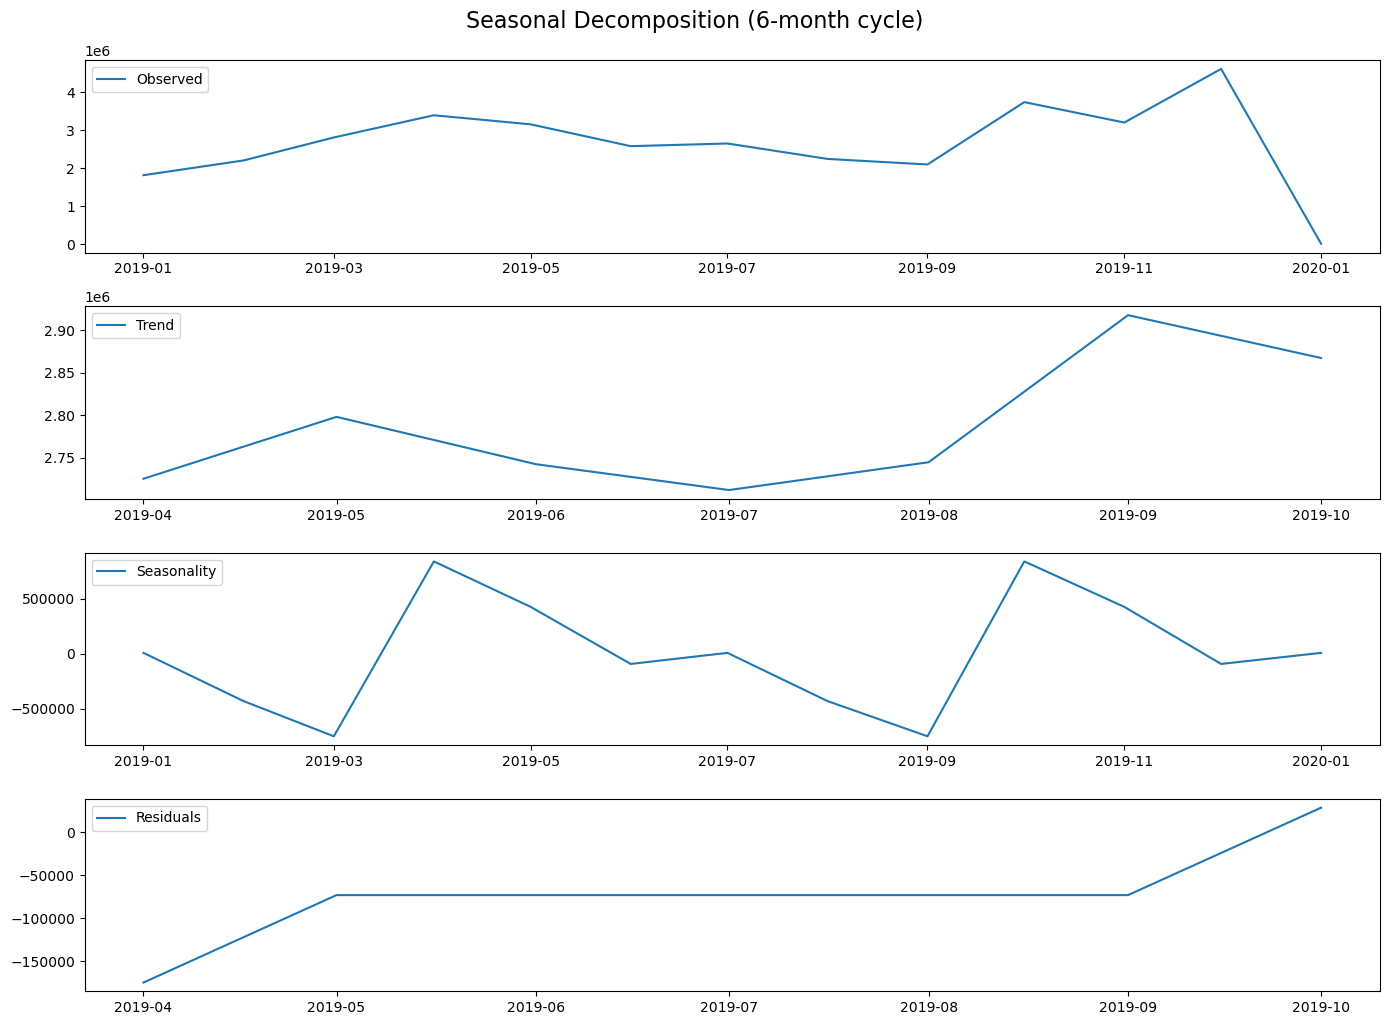

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load Excel
df = pd.read_csv("C:/Users/sheet/Downloads/cloudthat assignment/combined11_sales_data.csv")

# Clean data
df.dropna(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])

# Revenue calculation
df = df[df['Price Each'] > 0]
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

# Monthly revenue
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
monthly_sales.set_index('Month', inplace=True)

# Decompose with shorter period (e.g., 6 months)
decomposition = seasonal_decompose(monthly_sales['Revenue'], model='additive', period=6)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(411)
df.dropna(inplace=True)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.suptitle('Seasonal Decomposition (6-month cycle)', y=1.02, fontsize=16)
plt.show()

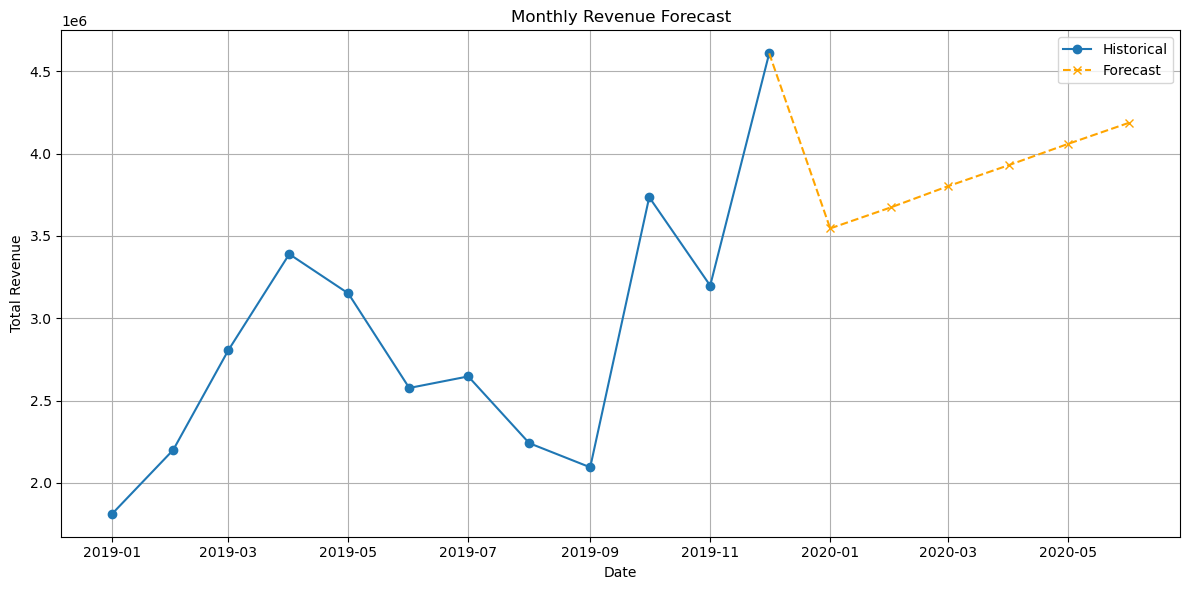

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Read the CSV file
df = pd.read_csv("combined11_sales_data.csv")

# Step 2: Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 3: Resample the data to get monthly revenue
monthly_revenue = df.resample('MS', on='Order Date')['Total Price'].sum()

# Step 4: Drop any NaN values
monthly_revenue = monthly_revenue.dropna()

# Step 5: Identify and remove the last data point (the decline) for forecasting
monthly_revenue_for_model = monthly_revenue[:-1]

# Step 6: Fit the Exponential Smoothing model with explicit parameters
# We set 'optimized=False' and provide the smoothing parameters to prevent the TypeError.
model = ExponentialSmoothing(monthly_revenue_for_model, trend='add', seasonal=None)
fit = model.fit(smoothing_level=0.2, smoothing_trend=0.2, optimized=False)

# Step 7: Forecast the next 6 months
forecast = fit.forecast(6)

# Step 8: Plot the data
plt.figure(figsize=(12, 6))

# Plot the historical data up to the point before the decline
plt.plot(monthly_revenue_for_model.index, monthly_revenue_for_model, label='Historical', marker='o')

# Plot the forecast starting from the last point of the historical data
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', marker='x', color='orange')

# Connect the last historical point directly to the first forecast point
last_hist_date = monthly_revenue_for_model.index[-1]
last_hist_value = monthly_revenue_for_model.iloc[-1]
first_forecast_date = forecast.index[0]
first_forecast_value = forecast.iloc[0]

plt.plot([last_hist_date, first_forecast_date], [last_hist_value, first_forecast_value],
         linestyle='--', color='orange')

# Add plot titles and labels
plt.title('Monthly Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [225]:
The Forecast
The dotted orange line represents the forecast for the next six months (January to June 2020). 
The forecast predicts that the revenue will continue to rise steadily, following the strong upward trend observed throughout 2019,
effectively ignoring the unusual decline in December. The model assumes that the sharp drop was a one-time event and that the 
business will return to its previous growth trajectory.

In simple terms, the forecast suggests you should expect your company's revenue to continue its growth in the first half of 2020, 
similar to how it was growing for most of 2019.

SyntaxError: unterminated string literal (detected at line 7) (3658346219.py, line 7)